## 볼린저 밴드 투자 전략
1. 이동 평균선 생성 : 데이터의 20개의 평균 값
2. 상단 밴드 생성 : 이동 평균선 + (2*20개의 데이터의 표준편차)
3. 하단 밴드 생성 : 이동 평균선 - (2*20개의 데이터의 표준편차)
4. 가격이 하단 밴드보다 낮은 경우 매수
5. 가격이 상단 밴드보다 낮은 경우 매도

In [7]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ------- ------------------------------- 30.7/162.3 kB 1.4 MB/s eta 0:00:01
     ----------------------------------- -- 153.6/162.3 kB 3.1 MB/s eta 0:00:01
     -------------------------------------- 162.3/162.3 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.6 MB 6.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/7.6 MB 4.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.6 MB 4.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.6 MB 5.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.6 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.6 MB 5.9 MB/s eta 0:00:02
   --------- -----

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
df = pd.read_csv('C:/Users/SAMSUNG/Documents/R/csv/AAPL.csv', index_col='Date')
df.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0


In [12]:
# 결측치, 무한대 데이터를 제거
flag = df.isin([np.nan, np.inf, -np.inf]).any(axis=1)

In [13]:
df = df.loc[~flag,['Adj Close']]

In [14]:
## 이동 평균선 생성
## 데이터들을 20개 모아서 평균
df.iloc[0:20,0].mean()

0.4432777

In [15]:
## 이동평균선 컬럼 생성 값들을 결측치로 대입
df['center'] = np.nan

In [16]:
df.head(3)

,Adj Close,center
Date,,
1980-12-12,0.410525,NaN
1980-12-15,0.389106,NaN
1980-12-16,0.360548,NaN


In [36]:
for i in range(20,len(df)+1):
    mean_data = df.iloc[i-20:i, 0].mean()
    df.iloc[i-1,1] = mean_data

In [37]:
df.iloc[18:23,]

,Adj Close,center,center2,ub,lb
Date,,,,,
1981-01-09,0.455147,NaN,NaN,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278,0.536950,0.349605
1981-01-13,0.435513,0.444527,0.444527,0.537019,0.352035
1981-01-14,0.437298,0.446937,0.446937,0.535789,0.358084
1981-01-15,0.446223,0.451220,0.451220,0.530255,0.372186


In [38]:
## rolling(n): n만큼 데이터의 개수를 그룹화한다.
df['center2'] = df["Adj Close"].rolling(20).mean()

In [39]:
df.iloc[18:24]

,Adj Close,center,center2,ub,lb
Date,,,,,
1981-01-09,0.455147,NaN,NaN,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278,0.536950,0.349605
1981-01-13,0.435513,0.444527,0.444527,0.537019,0.352035
1981-01-14,0.437298,0.446937,0.446937,0.535789,0.358084
1981-01-15,0.446223,0.451220,0.451220,0.530255,0.372186
1981-01-16,0.442653,0.454879,0.454879,0.524151,0.385608


In [40]:
# 상단 밴드, 하단 밴드 생성
# 상단 밴드 = 이동평균선 + (2*20개 데이터의 표준편차)
df['ub'] = df['center'] + (2*df['Adj Close'].rolling(20).std())

# 하단 밴드 = 이동평균선 - (2*20개 데이터의 표준편차)
df['lb'] = df['center'] - (2*df['Adj Close'].rolling(20).std())

In [41]:
df.iloc[18:23,]

,Adj Close,center,center2,ub,lb
Date,,,,,
1981-01-09,0.455147,NaN,NaN,NaN,NaN
1981-01-12,0.451577,0.443278,0.443278,0.536950,0.349605
1981-01-13,0.435513,0.444527,0.444527,0.537019,0.352035
1981-01-14,0.437298,0.446937,0.446937,0.535789,0.358084
1981-01-15,0.446223,0.451220,0.451220,0.530255,0.372186


In [42]:
# index를 시계열로 변경
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

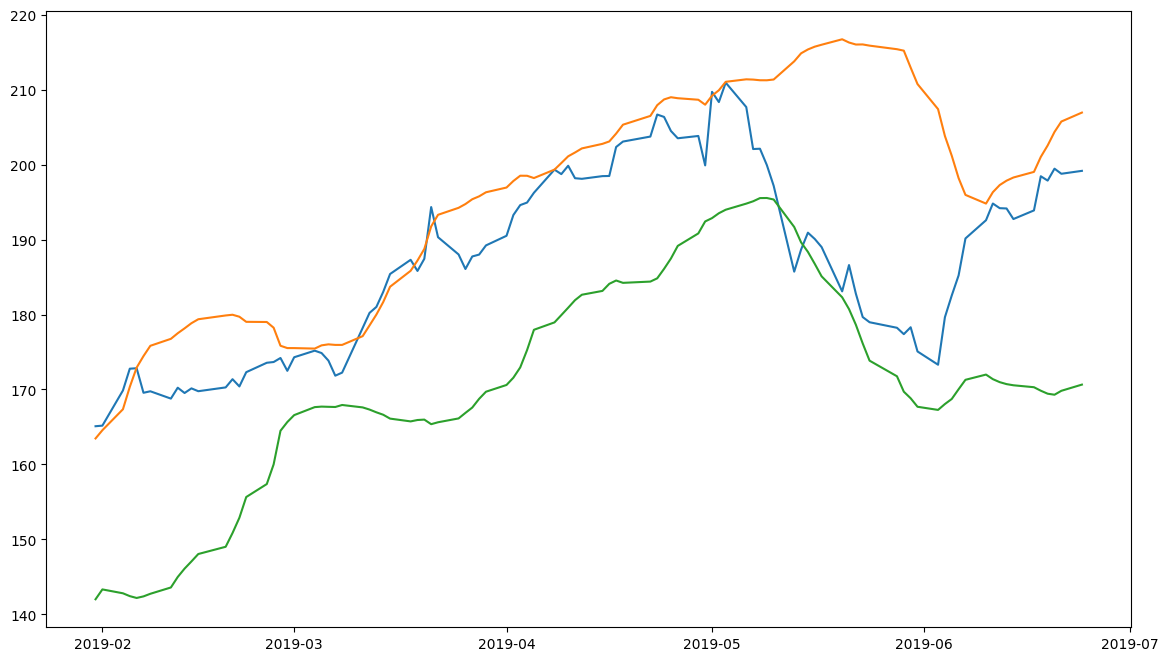

In [43]:
x = df.tail(100).index
price_y = df.tail(100)['Adj Close']
ub_y = df.tail(100)['ub']
lb_y = df.tail(100)['lb']


plt.figure(figsize=(14,8))
plt.plot(x,price_y)
plt.plot(x,ub_y)
plt.plot(x,lb_y)
plt.show()


<Axes: xlabel='Date'>

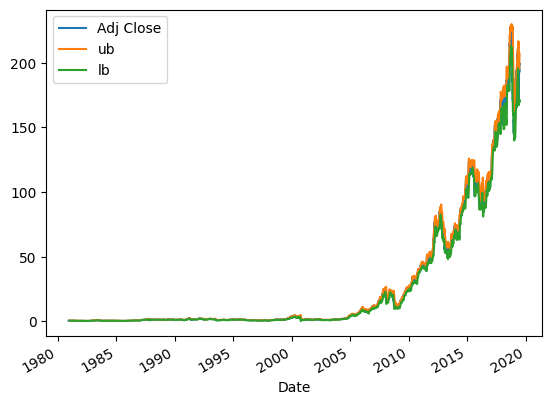

In [44]:
df[['Adj Close','ub','lb']].plot()

In [45]:
# 투자 기간 선택
start = '2010-01-01'
end = datetime.now()

In [46]:
# start는 시계열로 변경
start = datetime.strptime(start, '%Y-%m-%d')

In [48]:
test_df = df.loc[start:,]

In [49]:
# 구매 상태를 확인하는 컬럼을 생성
test_df['trade'] = ""

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_12488\2389447932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['trade'] = ""


### 보유 내역 추가
 - 조건식
   - 상단밴드보다 수정 주가가 높은 경우
     - 현재 보유 상태라면  -> 매도 (trade = "")
     - 보유 상태가 아니라면 -> 유지 (trade = "")
   - 상단밴드보다 낮고 하단밴드보다 높은 경우
     - 현재 보유 상태라면 -> 유지 (trade = "buy")
     - 보유 상태가 아니라면 -> 유지 (trade = "")
   - 하단밴드보다 낮거나 같은 경우
     - 현재 보유 상태라면 -> 유지 (trade = "buy")
     - 보유상태가 아니라면 -> 매수 (trade = "buy")

In [51]:
for i in test_df.index:
    # i 가 의미하는 것? test_df 의 index 값
    # print(i)
    # 수정주가가 상단밴드보다 높은 경우
    if test_df.loc[i,'Adj Close'] >= test_df.loc[i, 'ub']:
        # 현재 보유중이라면 -> trade를 ""로 변경
        # 전날의 trade가 buy라면
        if test_df.shift(1).loc[i, 'trade'] == 'buy':
            test_df.loc[i, 'trade'] = ""
        else:
            test_df.loc[i,'trade'] = ""
    # 하단밴드보다 수정주가가 낮거나 같은 경우
    elif test_df.loc[i, 'Adj Close'] <= test_df.loc[i, 'lb']:
        # 현재 보유중이라면 -> trade를 buy로 변경
        if test_df.shift().loc[i, 'trade'] == "buy":
            test_df.loc[i, 'trade'] = "buy"
        # 현재 보유중이 아니라면 -> 매수
        else:
            test_df.loc[i, 'trade'] = "buy"
    # 수정주가가 밴드 사이에 있을 때
    else:
        # 현재 보유상태라면 -> 유지 trade = buy
        if test_df.shift().loc[i, 'trade'] == 'buy':
            test_df.loc[i, 'trade'] = "buy"
        # 보유상태가 아니라면 -> 유지 
        else:
            test_df.loc[i, 'trade'] = ""

In [52]:
test_df['trade'].value_counts()

trade
       1439
buy     945
Name: count, dtype: int64

In [ ]:
test_df

### 수익률 계산
 - 구매한 날의 수정주가
   - 전날의 trade가 비어있고 오늘의 trade가 buy인 날의 수정 주가를 본다.
 - 판매한 날의 수정주가
   - 전날의 trade가 buy이고 오늘의 trade가 비었는 날의 수정 주가
 - 수익률
   - 판매한 날의 수정주가 / 구매한 날의 수정주가

In [54]:
# 수익률 파생변수 생성
test_df['rtn'] = 1

for i in test_df.index:
    # 구매가 생성
    if (test_df.shift().loc[i, 'trade']=="")& (test_df.loc[i, 'trade']=="buy"):
        buy = test_df.loc[i, 'Adj Close']
        print(f"매수일 : {i}, 매수가 : {buy}")
    # 판매가 생성
    elif (test_df.shift().loc[i,'trade']=="buy")&(test_df.loc[i,'trade']==""):
        sell = test_df.loc[i, 'Adj Close']
        # 수익률 계산
        rtn = sell / buy
        # 계산된 수익률을 test_df에 rtn컬럼에 대입
        test_df.loc[i, 'rtn'] = rtn
        print(f"매도일 : {i}, 매도가 : {sell}, 수익률 : {rtn}")

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_12488\3653223396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['rtn'] = 1
C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_12488\3653223396.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0568396777445188' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_df.loc[i, 'rtn'] = rtn


매수일 : 2010-01-22 00:00:00, 매수가 : 24.747818
매도일 : 2010-03-01 00:00:00, 매도가 : 26.154476, 수익률 : 1.0568396777445188
매수일 : 2010-08-24 00:00:00, 매수가 : 30.026524
매도일 : 2010-09-08 00:00:00, 매도가 : 32.90366, 수익률 : 1.0958198158401553
매수일 : 2011-03-16 00:00:00, 매수가 : 41.299767
매도일 : 2011-07-01 00:00:00, 매도가 : 42.957966, 수익률 : 1.040150323366231
매수일 : 2011-11-14 00:00:00, 매수가 : 47.463268
매도일 : 2011-12-27 00:00:00, 매도가 : 50.876015, 수익률 : 1.0719029081604747
매수일 : 2012-04-16 00:00:00, 매수가 : 72.601524
매도일 : 2012-06-18 00:00:00, 매도가 : 73.308609, 수익률 : 1.0097392583659814
매수일 : 2012-10-08 00:00:00, 매수가 : 80.207954
매도일 : 2013-07-29 00:00:00, 매도가 : 57.243137, 수익률 : 0.7136840443530077
매수일 : 2013-09-11 00:00:00, 매수가 : 60.184383
매도일 : 2013-10-18 00:00:00, 매도가 : 65.48336, 수익률 : 1.0880457144505413
매수일 : 2014-01-03 00:00:00, 매수가 : 70.019096
매도일 : 2014-03-25 00:00:00, 매도가 : 70.960335, 수익률 : 1.0134426042861222
매수일 : 2014-10-15 00:00:00, 매수가 : 89.842468
매도일 : 2014-10-23 00:00:00, 매도가 : 96.557182, 수익률 : 1.074738752724

In [58]:
acc_rtn = 1

for i in test_df.index:
    rtn = test_df.loc[i,'rtn']
    acc_rtn *= rtn
acc_rtn

1.3923287814461949

In [59]:
test_df['acc_rtn'] = test_df['rtn'].cumprod()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_12488\2922275961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['acc_rtn'] = test_df['rtn'].cumprod()


In [60]:
test_df.iloc[-1,]['acc_rtn']

1.3923287814461949

### 볼린저 밴드의 함수화
1. 밴드를 생성하는 함수
  - 매개 변수 5개 (데이터프레임, 기준되는 컬럼명, 시작시간, 종료시간, 데이터의 개수)
  - 기준이 되는 컬럼은 기본값을 Adj Close
  - 시작시간은 기본값 2010-01-01
  - 종료시간은 기본값 ""
  - 데이터의 개수 기본값은 20
  - 인덱스가 date인지 확인하여 아니라면 date를 인덱스로 변경
  - 인덱스를 시계열 데이터로 변경
  - 시작시간, 종료시간을 시계열 데이터로 변경
  - 격측치, 무한대 값을 제외
  - 기준이 되는 컬럼을 제외하고 모두 삭제
  - 이동 평균선, 상단밴드, 하단밴드 생성
  - 시작시간, 종료시간으로 데이터 필터
  - 위의 과정에서 나온 데이터프레임을 리턴


In [71]:
def create_band(
        _df, _col = 'Adj Close', 
        _start = "2010-01-01",
        _end = datetime.now(),
        _cnt = 20):
    df = _df.copy()
    # 인텍스가 Date인가?
    if 'Date' in df.columns:
        df.set_index('Date', inplace=True)

    # index를 시계열 데이터로 변경
    df.index = pd.to_datetime(df.index, format = "%Y-%m-%d")

    # 시작시간과 종료시간을 시계열로 변경
    try:
        start = datetime.strptime(_start, "%Y-%m-%d")
        if type(_end) == "str":
            _end = datetime.strptime(_end, '%Y-%m-%d')
        else:
            end = _end
    except:
        return "인자값의 타입이 잘못되었습니다.(예 : YYYY-mm-dd)"
    
    # 결측치와 무한대 값을 제외
    flag = df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    df = df.loc[~flag,]

    # 기준이 되는 컬럼을 제외하고 모두 삭제
    result = df[[_col]]

    # 이동평균선, 상단밴드, 하단밴드 생성
    result['center'] = result[_col].rolling(_cnt).mean()
    result['ub'] = result['center'] + (2 *result[_col].rolling(_cnt).std())
    result['lb'] = result['center'] - (2 *result[_col].rolling(_cnt).std())

    # 시작시간과 종료시간으로 필터링
    result = result.loc[start:end,]

    return result

In [72]:
df = pd.read_csv('C:/Users/SAMSUNG/Documents/R/csv/AMZN.csv')

In [ ]:
band_df = create_band(df)

In [74]:
band_df.head()

,Adj Close,center,ub,lb
Date,,,,
2010-01-04,133.899994,133.984001,141.460445,126.507556
2010-01-05,134.690002,133.839500,141.132776,126.546225
2010-01-06,132.250000,133.741500,141.066419,126.416581
2010-01-07,130.000000,133.536000,141.045671,126.026329
2010-01-08,133.520004,133.646500,141.082939,126.210062


 - 트레이드 컬럼을 생성하는 함수
   - 매개변수 1개 -> 1번 함수에서 생성된 데이터프레임 인자 값으로 받아온다.
   - trade 컬럼을 생성하여 값들에 "" 대입
   - 밴드들을 이용하여 보유 상태를 대입
   - 결과값을 리턴

In [75]:
def create_trade(_df):
    # 기준이 되는 컬럼의 이름을 변수에 저장
    col = _df.columns[0]

    df = _df.copy()

    # 거래 내역이라는 컬럼을 생성
    df['trade'] = ""

    # 거래 내역 추가
    for i in df.index:
        # 상단밴드보다 기준이 되는 컬럼의 값이 높거나 같은 경우
        if df.loc[i,col] >= df.loc[i, 'ub']:
            df.loc[i, 'trade']= ""
        # 하단밴드보다 col의 값이 작거나 같은 경우
        elif df.loc[i, col] <= df.loc[i, 'lb']:
            df.loc[i, 'trade'] = "buy"
        #밴드 사이에 col의 값이 존재한다면
        else:
            df.loc[i,'trade'] = df.shift().loc[i, 'trade']
    return df

In [76]:
trade_df = create_trade(band_df)

In [77]:
trade_df['trade'].value_counts()

trade
       1483
buy     863
Name: count, dtype: int64

 - 수익률 계산하는 함수
   - 매개변수 1개 -> 2번 함수에서 나온 결과를 인자값으로 받아온다.
   - 수일률('rtn')컬럼을 생성하여 데이터는 1 대입
   - 구매한 날의 데이터와 판매한 날의 데이터를 기준으로 수일률을 계산하여 rtn에 대입
   - 누적수익률('acc_rtn') 컬럼을 생성하여 수익률의 누적곱을 대입
   - 결과는 데이터프레임과 총 누적수익률을 리턴


In [80]:
def create_rtn(_df):
    # 기준이 되는 컬럼을 변수에 저장
    col = _df.columns[0]
    # 복사본 생성
    df = _df.copy()
    # 수익률 파생변수 생성
    df['rtn'] = 1

    # 수익률 계산하는 반복문
    for i in df.index:
        # 구매한 날
        if (df.shift().loc[i, 'trade']=='')&(df.loc[i, 'trade']=='buy'):
            buy = df.loc[i, col]
            print(f"매수일 : {i}, 매수가 : {buy}")
        # 판매한 날
        elif (df.shift().loc[i,'trade']=='buy')&(df.loc[i,'trade']== ""):
            sell = df.loc[i,col]
            rtn = sell / buy
            print(f"매도일 : {i}, 매도가 : {sell}, 수익률 : {rtn}")
            df.loc[i,'rtn'] = rtn
    # 누적 수익률 계산
    df['acc_rtn'] = df['rtn'].cumprod()
    acc_rtn = df.iloc[-1,]['acc_rtn']
    return df, acc_rtn

In [81]:
create_rtn(trade_df)

매수일 : 2010-05-04 00:00:00, 매수가 : 129.830002
매도일 : 2010-08-04 00:00:00, 매도가 : 127.580002, 수익률 : 0.9826696451872502
매수일 : 2010-11-16 00:00:00, 매수가 : 157.779999
매도일 : 2010-11-24 00:00:00, 매도가 : 177.25, 수익률 : 1.1233996775472155
매수일 : 2011-01-21 00:00:00, 매수가 : 177.419998
매도일 : 2011-03-30 00:00:00, 매도가 : 179.419998, 수익률 : 1.0112726864082142
매수일 : 2011-06-06 00:00:00, 매수가 : 185.690002
매도일 : 2011-06-27 00:00:00, 매도가 : 201.25, 수익률 : 1.0837955615941024
매수일 : 2011-08-04 00:00:00, 매수가 : 201.479996
매도일 : 2011-10-14 00:00:00, 매도가 : 246.710007, 수익률 : 1.2244888420585436
매수일 : 2011-10-26 00:00:00, 매수가 : 198.399994
매도일 : 2012-01-18 00:00:00, 매도가 : 189.440002, 수익률 : 0.9548387486342363


C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_12488\2986667000.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9826696451872502' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i,'rtn'] = rtn


매수일 : 2012-10-10 00:00:00, 매수가 : 244.990005
매도일 : 2012-11-29 00:00:00, 매도가 : 251.270004, 수익률 : 1.0256336947297096
매수일 : 2013-04-29 00:00:00, 매수가 : 249.740005
매도일 : 2013-06-07 00:00:00, 매도가 : 276.869995, 수익률 : 1.1086329360808655
매수일 : 2013-08-14 00:00:00, 매수가 : 291.339996
매도일 : 2013-09-18 00:00:00, 매도가 : 312.029999, 수익률 : 1.0710166928127507
매수일 : 2014-01-24 00:00:00, 매수가 : 387.600006
매도일 : 2014-03-05 00:00:00, 매도가 : 372.369995, 수익률 : 0.9607068865731648
매수일 : 2014-03-24 00:00:00, 매수가 : 351.850006
매도일 : 2014-06-05 00:00:00, 매도가 : 323.570007, 수익률 : 0.9196248443434728
매수일 : 2014-09-15 00:00:00, 매수가 : 323.890015
매도일 : 2014-11-14 00:00:00, 매도가 : 327.820007, 수익률 : 1.0121337238506718
매수일 : 2015-01-15 00:00:00, 매수가 : 286.950012
매도일 : 2015-01-30 00:00:00, 매도가 : 354.529999, 수익률 : 1.2355113579852366
매수일 : 2015-03-10 00:00:00, 매수가 : 369.51001
매도일 : 2015-04-08 00:00:00, 매도가 : 381.200012, 수익률 : 1.031636496126316
매수일 : 2015-08-20 00:00:00, 매수가 : 515.780029
매도일 : 2015-10-23 00:00:00, 매도가 : 599.030029, 수

(              Adj Close       center           ub           lb trade  rtn  \
 Date                                                                        
 2010-01-04   133.899994   133.984001   141.460445   126.507556  None  1.0   
 2010-01-05   134.690002   133.839500   141.132776   126.546225  None  1.0   
 2010-01-06   132.250000   133.741500   141.066419   126.416581  None  1.0   
 2010-01-07   130.000000   133.536000   141.045671   126.026329  None  1.0   
 2010-01-08   133.520004   133.646500   141.082939   126.210062  None  1.0   
 ...                 ...          ...          ...          ...   ...  ...   
 2019-06-18  1901.369995  1821.456500  1935.384678  1707.528322   buy  1.0   
 2019-06-19  1908.790039  1824.020001  1943.535145  1704.504858   buy  1.0   
 2019-06-20  1918.189941  1826.945495  1952.830613  1701.060378   buy  1.0   
 2019-06-21  1911.300049  1831.736499  1962.964470  1700.508528   buy  1.0   
 2019-06-24  1907.953857  1835.970190  1971.444249  1700.496132 